## Business Problem:
Today, London's Airbnb hosts are facing pricing uncertainty due to variation in location accessibility, room type, and guest satisfaction. This analysis investigates the key drivers of listing price to support data-driven pricing and positioning decisions.

## Step 1: Loading the dataset : london_airbnb_listing.csv

***Import Libraries:***
Importing the libraries to perform data analysis and plotting our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Load Data:***
On the selected dataset: London Airbnb Listing which is a CSV file, evaluate pricing drivers by using "read_csv" to load the dataset and assign to the dataframe. We also added skipping rows as 3 because the dataset had few descriptions in the first 3 rows.

In [2]:
df = pd.read_csv("C:\\Users\\sagri\\Documents\\GitHub\\Projects\\LondonAirbnbPricingAnalysis\\Data\\london_airbnb_listing (2).csv", skiprows=3) #loading the dataframe to perform analysis
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat
0,0,121.12,Private room,FALSE,True,2.0,False,0,0.0,6.0,69.0,1.0,5.734117,0.437094,222.882243,470.088503,-0.04975,51.52570
1,1,195.91,Private room,FALSE,True,2.0,False,1,0.0,10.0,96.0,1.0,4.788905,1.464050,235.385841,530.133525,-0.08475,51.54210
2,2,193.33,Private room,FALSE,True,3.0,False,1,0.0,10.0,95.0,1.0,4.596677,0.450306,268.913812,548.987610,-0.14585,51.54802
3,3,180.39,Private room,FALSE,True,2.0,False,1,0.0,9.0,87.0,1.0,2.054769,0.132670,472.381314,1021.271062,-0.10611,51.52108
4,4,405.7,Entire home/apt,FALSE,False,3.0,False,0,1.0,7.0,65.0,0.0,4.491277,0.354108,318.491470,692.775411,-0.18797,51.49399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5374,1035.07,Private room,salse,True,2.0,False,0,1.0,10.0,100.0,0.0,5.155373,0.883829,271.191201,528.042180,-0.05357,51.51255
5375,5375,181.1,Private room,FALSE,True,2.0,False,1,0.0,10.0,100.0,1.0,5.072177,0.344055,268.165870,554.906232,NaN,51.51823
5376,5376,420.52,Entire home/apt,FALSE,False,2.0,False,0,0.0,10.0,98.0,1.0,6.709982,0.926188,181.892001,395.397885,-0.22172,51.52180
5377,5377,217.31,Private room,FALSE,True,2.0,False,0,0.0,10.0,94.0,1.0,6.736940,0.353634,184.278328,471.029678,-0.22286,51.49715


***Explore Data:***
Before we begin checking on the data cleaning, we have to understand how the data looks. Using head function to get an overview of the records.

In [4]:
# Display the first 10 records of the dataset to get a quick overview
df.head(10)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat
0,0,121.12,Private room,FALSE,True,2.0,False,0,0.0,6.0,69.0,1.0,5.734117,0.437094,222.882243,470.088503,-0.04975,51.52570
1,1,195.91,Private room,FALSE,True,2.0,False,1,0.0,10.0,96.0,1.0,4.788905,1.464050,235.385841,530.133525,-0.08475,51.54210
2,2,193.33,Private room,FALSE,True,3.0,False,1,0.0,10.0,95.0,1.0,4.596677,0.450306,268.913812,548.987610,-0.14585,51.54802
3,3,180.39,Private room,FALSE,True,2.0,False,1,0.0,9.0,87.0,1.0,2.054769,0.132670,472.381314,1021.271062,-0.10611,51.52108
4,4,405.7,Entire home/apt,FALSE,False,3.0,False,0,1.0,7.0,65.0,0.0,4.491277,0.354108,318.491470,692.775411,-0.18797,51.49399
5,5,354.19,Entire home/apt,FALSE,False,2.0,False,0,1.0,9.0,93.0,0.0,4.467894,0.350749,321.864600,703.068564,-0.18805,51.49473
6,6,430.4,Private room,FALSE,True,2.0,True,0,1.0,10.0,97.0,1.0,1.787295,0.253827,509.098946,1071.720709,-0.11023,51.52023
7,7,244.83,Private room,FALSE,True,2.0,NaN,0,1.0,9.0,88.0,1.0,2.430836,0.546799,412.057147,932.666193,-0.11644,51.52905
8,8,438.16,Entire home/apt,FALSE,False,4.0,False,0,1.0,9.0,87.0,1.0,1.490442,0.126230,575.923337,1454.379423,-0.13621,51.52057
9,9,128.88,Private room,FALSE,True,2.0,True,1,0.0,10.0,97.0,1.0,12.806673,5.292438,96.536295,195.835896,0.03848,51.45827


In [3]:
df.shape #checking the shape of the dataset, rows x columns

(5379, 18)

Running info gives an idea about the details of the columns, their datatypes and the helps with further data cleaning process and data transformation.

In [4]:
print(df.info()) #generating basic information about the dataset

<class 'pandas.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5379 non-null   int64  
 1   realSum                     5372 non-null   str    
 2   room_type                   5359 non-null   str    
 3   room_shared                 5357 non-null   str    
 4   room_private                5358 non-null   object 
 5   person_capacity             5362 non-null   float64
 6   host_is_superhost           5365 non-null   object 
 7   multi                       5372 non-null   str    
 8   biz                         5370 non-null   float64
 9   cleanliness_rating          5363 non-null   float64
 10  guest_satisfaction_overall  5372 non-null   float64
 11  bedrooms                    5375 non-null   float64
 12  dist                        5352 non-null   float64
 13  metro_dist                  5362 non-null   

In [5]:
df.isna().mean().sort_values(ascending=False) #checking for missing values in the dataframe
#This output shows that there are not many missing values, lesser than 1% of the data

dist                          0.005020
room_shared                   0.004090
room_private                  0.003904
room_type                     0.003718
metro_dist                    0.003160
attr_index                    0.003160
person_capacity               0.003160
cleanliness_rating            0.002975
host_is_superhost             0.002603
rest_index                    0.002045
lng                           0.002045
biz                           0.001673
multi                         0.001301
realSum                       0.001301
guest_satisfaction_overall    0.001301
lat                           0.001115
bedrooms                      0.000744
Unnamed: 0                    0.000000
dtype: float64

## Step 2: Data Cleaning and Data Preparation

***handling missing values, formatting/renaming the columns, removing duplicates, data transformation***

In [6]:
df.duplicated().sum() #checking for duplicates on the overall datasets

np.int64(0)

Since there is no duplicates we didn't remove the duplicate

In [7]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat'],
      dtype='str')

Since our business question revolved around specific columns only, we are dropping the unnecessary columns before performing further analysis and putting it into a new dataframe so that the original dataset is not affected and we can always come back to the starting point.

In [8]:
# Filtering for required columns for analysis and updating the existing dataframe
Required_Columns = ['realSum', 'room_type', 'bedrooms', 'guest_satisfaction_overall', 'dist', 'metro_dist']
df_filtered = df[Required_Columns]
df_filtered

,realSum,room_type,bedrooms,guest_satisfaction_overall,dist,metro_dist
0,121.12,Private room,1.0,69.0,5.734117,0.437094
1,195.91,Private room,1.0,96.0,4.788905,1.464050
2,193.33,Private room,1.0,95.0,4.596677,0.450306
3,180.39,Private room,1.0,87.0,2.054769,0.132670
4,405.7,Entire home/apt,0.0,65.0,4.491277,0.354108
...,...,...,...,...,...,...
5374,1035.07,Private room,0.0,100.0,5.155373,0.883829
5375,181.1,Private room,1.0,100.0,5.072177,0.344055
5376,420.52,Entire home/apt,1.0,98.0,6.709982,0.926188
5377,217.31,Private room,1.0,94.0,6.736940,0.353634


Renaming the column before checking for the missing values for clarity

In [9]:
#Renaming the filtered dataframe for clarity
df_filtered=df_filtered.rename(columns = {'realSum':'Price', 'dist':'City_Center_Distance', 'metro_dist':'Metro_Distance'})
#Using the code below to captitalize for name formatting
df_filtered.columns = [str(x).title() for x in df_filtered.columns]
df_filtered

,Price,Room_Type,Bedrooms,Guest_Satisfaction_Overall,City_Center_Distance,Metro_Distance
0,121.12,Private room,1.0,69.0,5.734117,0.437094
1,195.91,Private room,1.0,96.0,4.788905,1.464050
2,193.33,Private room,1.0,95.0,4.596677,0.450306
3,180.39,Private room,1.0,87.0,2.054769,0.132670
4,405.7,Entire home/apt,0.0,65.0,4.491277,0.354108
...,...,...,...,...,...,...
5374,1035.07,Private room,0.0,100.0,5.155373,0.883829
5375,181.1,Private room,1.0,100.0,5.072177,0.344055
5376,420.52,Entire home/apt,1.0,98.0,6.709982,0.926188
5377,217.31,Private room,1.0,94.0,6.736940,0.353634


While checking on the datatypes of the columns, we realised that the Price column in the original dataset was an object but it hold numeric values. So writing the code below to convert it into a numeric datatype, and rechecking it again.

In [10]:
#converts price column in object type to numeric. This is necessary to perform numerical analysis on price value
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
df_filtered.info()

<class 'pandas.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       5370 non-null   float64
 1   Room_Type                   5359 non-null   str    
 2   Bedrooms                    5375 non-null   float64
 3   Guest_Satisfaction_Overall  5372 non-null   float64
 4   City_Center_Distance        5352 non-null   float64
 5   Metro_Distance              5362 non-null   float64
dtypes: float64(5), str(1)
memory usage: 252.3 KB


In order to perform the analysis, we are trying to check the correlation between the different variables to understand how well they can fit. Based on the result, we narrowed down the columns to just metro distance and guest satisfaction.

<Axes: >

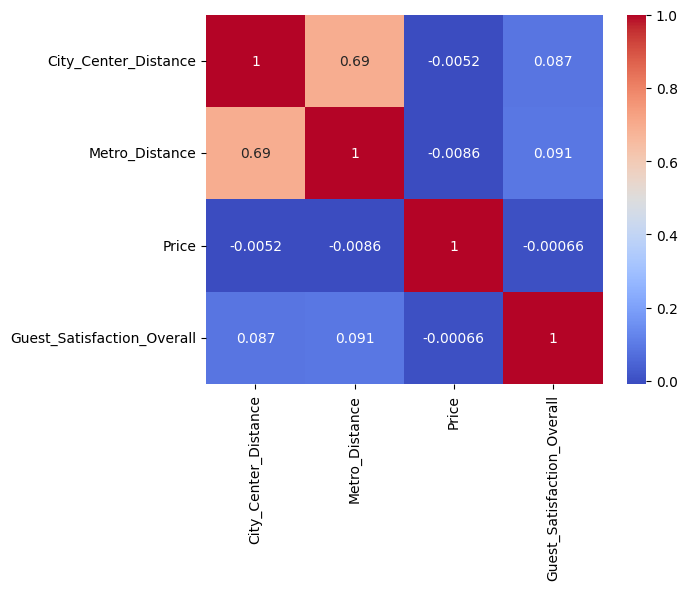

In [11]:
#Checking for Correlations among data columns
correlation_matrix = df_filtered[['City_Center_Distance', 'Metro_Distance', 'Price', 'Guest_Satisfaction_Overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [12]:
df_filtered.isna().sum() #Check for any missing values
#in Price column: there are two records with preceding $.. it is also being considered as missing value

Price                          9
Room_Type                     20
Bedrooms                       4
Guest_Satisfaction_Overall     7
City_Center_Distance          27
Metro_Distance                17
dtype: int64

<Axes: >

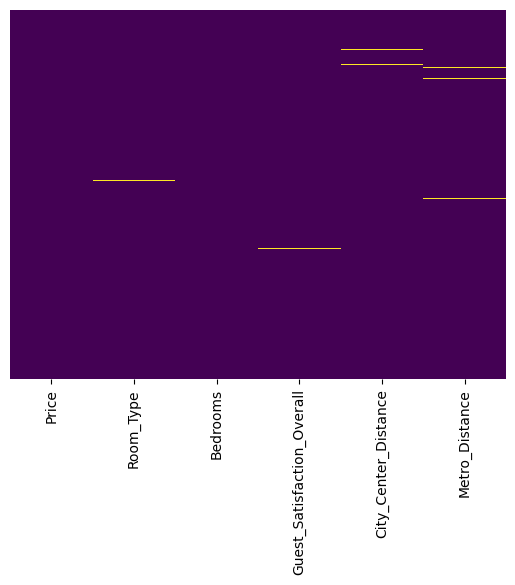

In [13]:
#using heatmap, trying to visually confirm the pattern of these missing values to drop in next step
df_filtered.loc[:, df_filtered.isna().sum() != 0].columns
sns.heatmap(df_filtered.isna(), yticklabels=False, cbar=False, cmap='viridis')

,Price,Room_Type,Bedrooms,Guest_Satisfaction_Overall,City_Center_Distance,Metro_Distance
0,121.12,Private room,1.0,69.0,5.734117,0.437094
1,195.91,Private room,1.0,96.0,4.788905,1.464050
2,193.33,Private room,1.0,95.0,4.596677,0.450306
3,180.39,Private room,1.0,87.0,2.054769,0.132670
4,405.70,Entire home/apt,0.0,65.0,4.491277,0.354108
...,...,...,...,...,...,...
5374,1035.07,Private room,0.0,100.0,5.155373,0.883829
5375,181.10,Private room,1.0,100.0,5.072177,0.344055
5376,420.52,Entire home/apt,1.0,98.0,6.709982,0.926188
5377,217.31,Private room,1.0,94.0,6.736940,0.353634


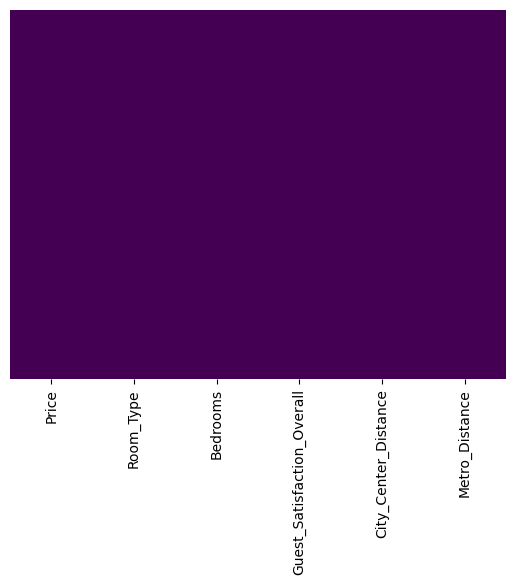

In [14]:
#There were missing values less than 1%, so instead of filling them, we dropped them to get a refined dataset now.
#Keeping the dataset clean is vital for accurate analysis
df_cleaned = df_filtered.copy()
df_cleaned = df_cleaned.dropna()
df_cleaned.loc[:, df_cleaned.isna().sum() != 0].columns
sns.heatmap(df_cleaned.isna(), yticklabels=False, cbar=False, cmap='viridis')
df_cleaned

Since we need Room Type column for our analysis, we wanted to understand the consistant values in this column. By checking the unique function, we got the idea that there are some inconsistencies which we wanted to rectify. Also as we know that if the bedrooms are 0 it is considered as Studio. So we also wanted to incorporate this condition and create four versions on room type to show how the price is changing across them.

In [15]:
df_cleaned['Room_Type'].unique() #Checking for data transformation of this column

<StringArray>
[   'Private room', 'Entire home/apt',     'Shared room',  'Entire homeapt',
    'private room',     'Privte room',   'Private rooms', 'Entire home apt',
 'Entire home-apt', 'Entire home_apt']
Length: 10, dtype: str

In [16]:
# Replace inconsistencies in the 'Room Type' column. This ensures uniformity in room type classification, which is crucial for accurate analysis
corrections = {
    'Private room': 'Private', 'private room': 'Private', 'Privte room': 'Private','Private rooms': 'Private', 
    'Entire home/apt': 'Entire Home/Apt', 'Entire homeapt': 'Entire Home/Apt', 'Entire home apt': 'Entire Home/Apt',
    'Entire home-apt': 'Entire Home/Apt', 'Entire home_apt': 'Entire Home/Apt', 'Shared room': 'Shared'
}
df_cleaned.loc[:, 'Room_Type'] = df_cleaned['Room_Type'].replace(corrections)

# Update 'bedrooms' column: If bedrooms == 0, change it to 'Studio'. It categorizes properties with no bedrooms correctly for analysis
df_cleaned.loc[df_cleaned['Bedrooms'] == 0, 'Room_Type'] = 'Studio'

#Dropping this column as it is no longer needed
df_cleaned.drop(columns='Bedrooms',inplace=True)
df_cleaned

,Price,Room_Type,Guest_Satisfaction_Overall,City_Center_Distance,Metro_Distance
0,121.12,Private,69.0,5.734117,0.437094
1,195.91,Private,96.0,4.788905,1.464050
2,193.33,Private,95.0,4.596677,0.450306
3,180.39,Private,87.0,2.054769,0.132670
4,405.70,Studio,65.0,4.491277,0.354108
...,...,...,...,...,...
5374,1035.07,Studio,100.0,5.155373,0.883829
5375,181.10,Private,100.0,5.072177,0.344055
5376,420.52,Entire Home/Apt,98.0,6.709982,0.926188
5377,217.31,Private,94.0,6.736940,0.353634


In [17]:
df_cleaned['Room_Type'].unique()

<StringArray>
['Private', 'Studio', 'Entire Home/Apt', 'Shared']
Length: 4, dtype: str

As a part of data cleaning, checking for outliers and removing it also enhances the visualization. So we wanted to check for outliers on the numeric columns.

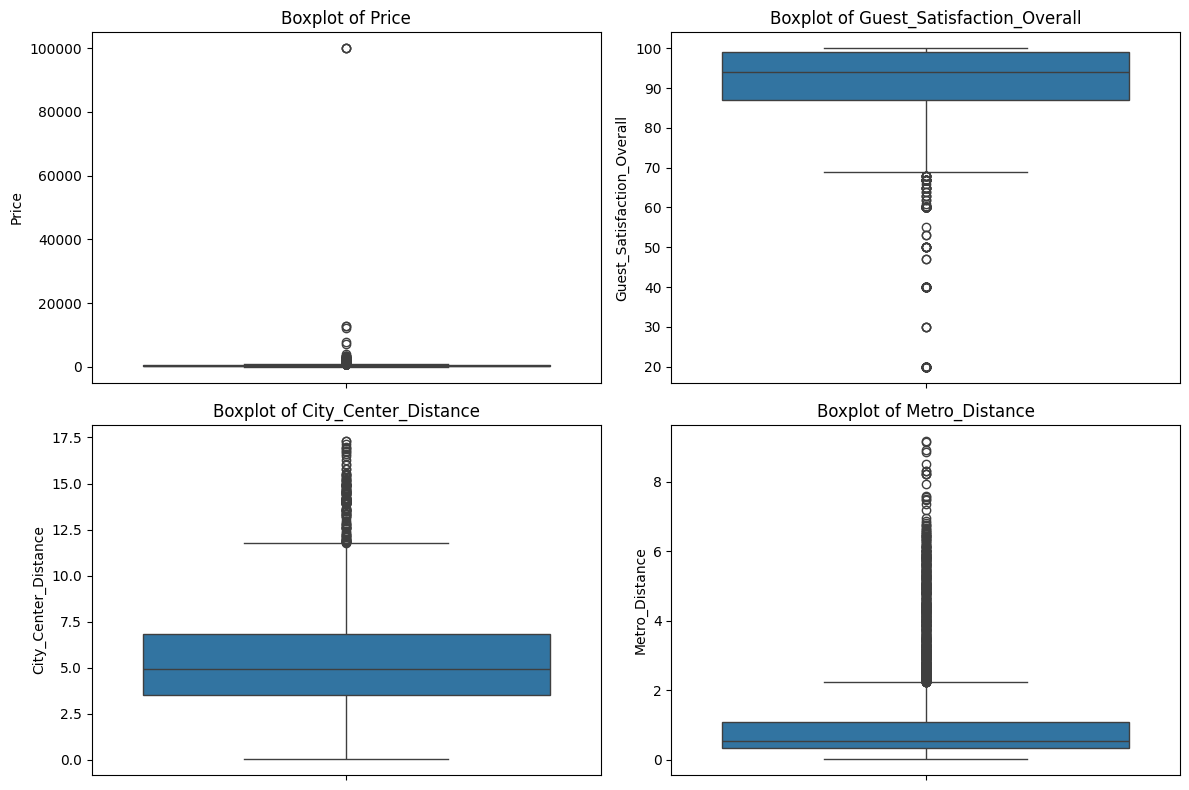

In [18]:
# Columns to identify potential outliers
outlier_cols = ['Price', 'Guest_Satisfaction_Overall', 'City_Center_Distance', 'Metro_Distance']

# Create a boxplot for each variable in outlier_cols
plt.figure(figsize=(12, 8))
for i, column in enumerate(outlier_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout() #to automatically give padding for subplots
plt.show()
#Using ennumerate helps with keeping count of iterations. Here 'i' , since we are using it for subplot

Box Plot give an idea of how well the outliers are removed and how the mean, min, max, quantiles are throughout the dataset.

Data shape after removing outliers: (4228, 5)


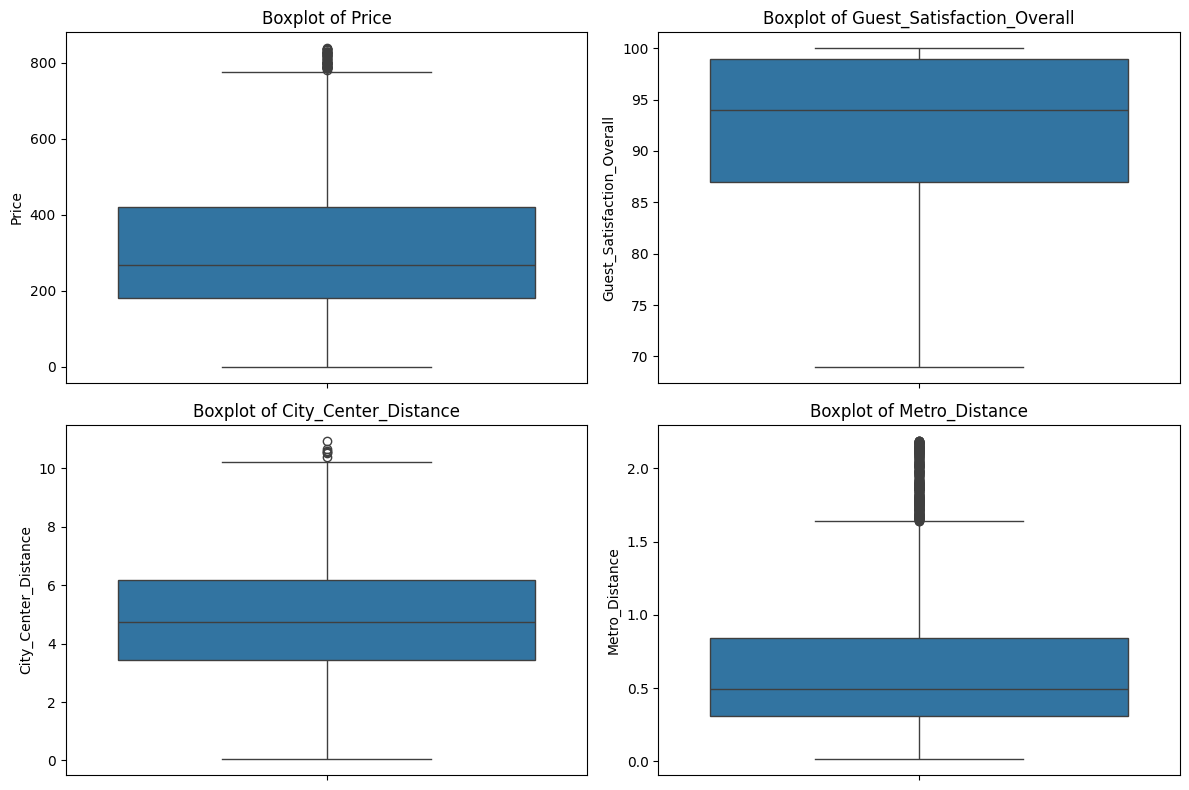

In [19]:
# Function to remove outliers using the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each numerical column 
# This step ensures the dataset is not skewed by extreme values, which can distort analysis results
for col in outlier_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

# Check the shape of the DataFrame after removing outliers
print("Data shape after removing outliers:", df_cleaned.shape)
plt.figure(figsize=(12, 8))
for i, column in enumerate(outlier_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [20]:
df_cleaned.describe()#overview statistics for numerical column

,Price,Guest_Satisfaction_Overall,City_Center_Distance,Metro_Distance
count,4228.000000,4228.000000,4228.000000,4228.000000
mean,315.853162,92.099574,4.865988,0.646843
std,168.615947,7.604599,2.064959,0.482574
min,0.120000,69.000000,0.040561,0.013875
25%,180.390000,87.000000,3.422349,0.308183
50%,268.120000,94.000000,4.728052,0.493292
75%,420.280000,99.000000,6.162526,0.841519
max,837.510000,100.000000,10.948259,2.188286


## Step 3: Business Question

How does guest satisfaction and metro distance affect the prices of Airbnb Listings in London across different types of rooms?

## Step 4: Data Visualisation

As per the business question, we chose metro distance and guest satisfaction as these listings are from London and moving around the city needs easy access to metro. Therefore, we categorised the metro distance into "Very Close", "Close", "Moderate", "Far" so that it is easier to present it in the graph. Similarly, guest satisfaction was also continuous, so we put them into bins of "Low", "Moderate", "High" for feasibility. We wanted to understand how these two factors affect the prices based on different rooms. The bar plot would be easier for the client to understand and make target audience segmentations and enhance their existing listings across London.

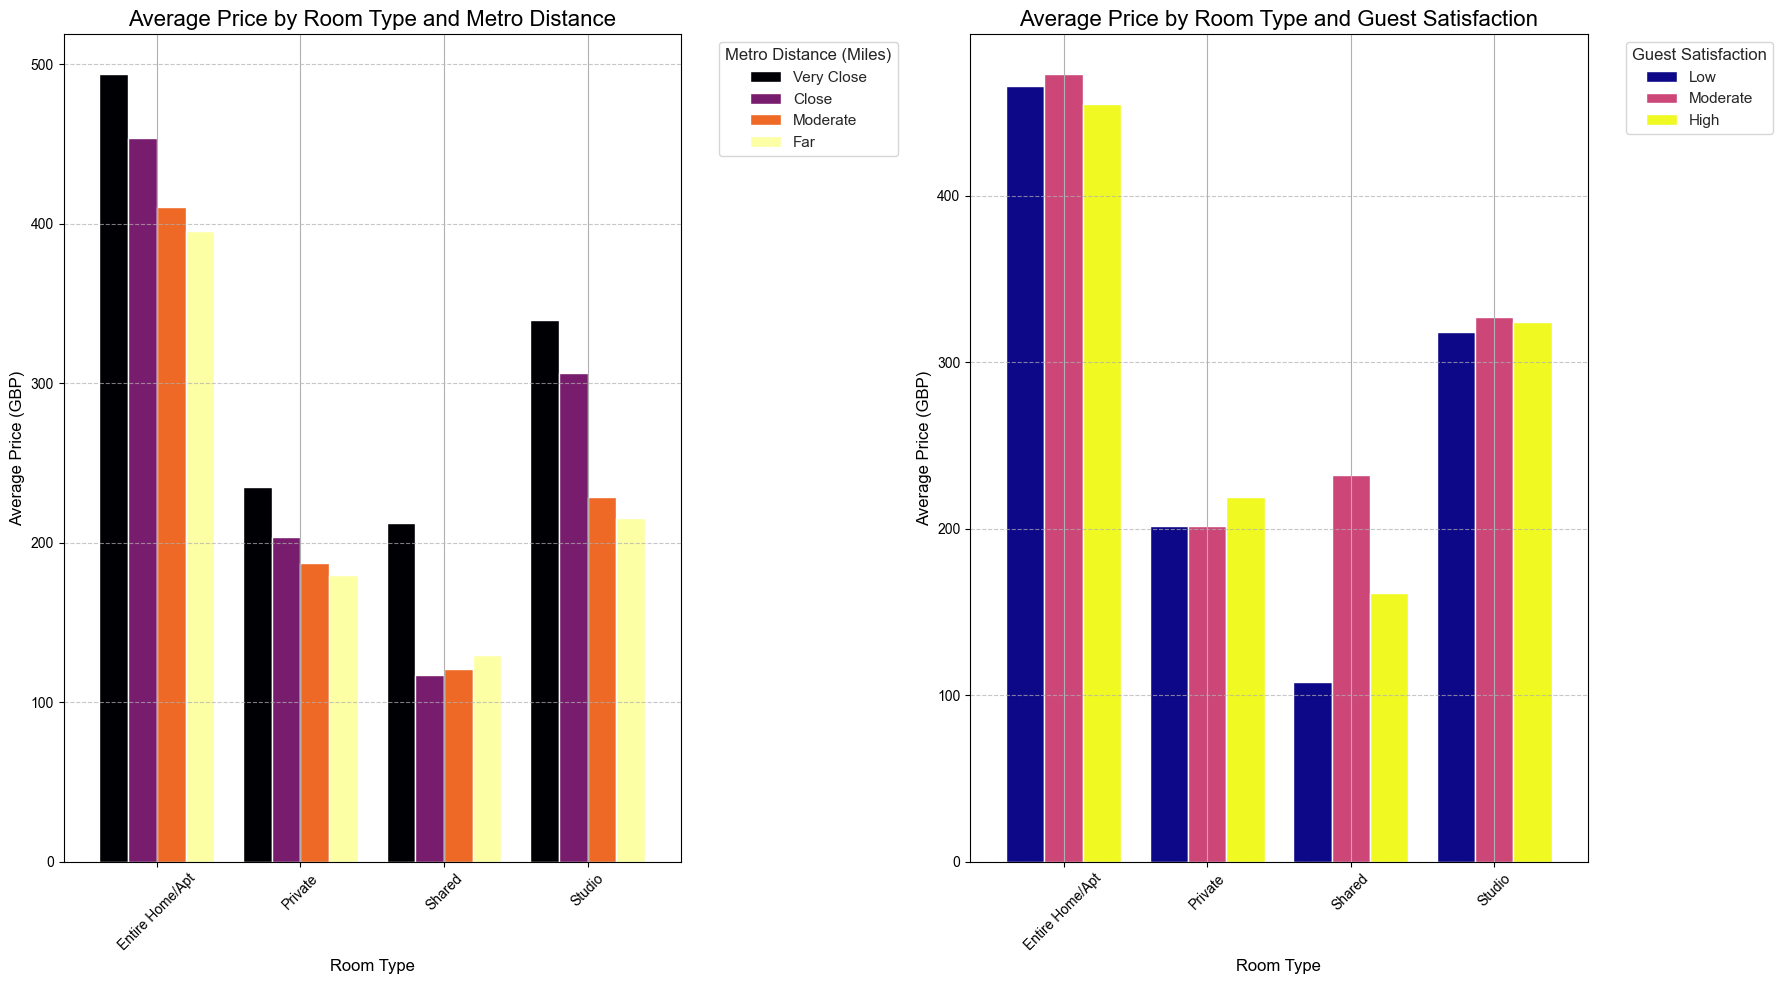

In [21]:
# Copying the dataframe so that the cleaned dataset is untouched
df_plot = df_cleaned.copy()

#Creating bins for metro distance to categorize them
metro_bins = [0.00, 0.50, 1.00, 1.50, 2.19]
metro_labels = ['Very Close', 'Close', 'Moderate', 'Far']
df_plot['Metro_Distance_Bins'] = pd.cut(df_plot['Metro_Distance'], bins=metro_bins, labels=metro_labels, right=False)

#Creating bins for Guest Satisfaction to categorize them
guest_bins = [69, 84, 94, 100]
guest_labels = ['Low', 'Moderate', 'High']
df_plot['Guest_Satisfaction_Bins'] = pd.cut(df_plot['Guest_Satisfaction_Overall'], bins=guest_bins, labels=guest_labels, right=False)

#Grouping the data based on Room type & Metro distance
avg_price_room_metro = df_plot.groupby(['Room_Type', 'Metro_Distance_Bins'],observed=False)['Price'].mean().unstack()

#Grouping the data based on Room type & Guest Satisfaction Overall
avg_price_room_satisfaction = df_plot.groupby(['Room_Type', 'Guest_Satisfaction_Bins'],observed=False)['Price'].mean().unstack()

# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

sns.set_theme(style="whitegrid")  # Set a theme for the plots

# Metro Distance graph on the first subplot
avg_price_room_metro.plot(kind='bar', ax=axes[0], colormap='inferno', width=0.8)
axes[0].set_title('Average Price by Room Type and Metro Distance', fontsize=16)
axes[0].set_xlabel('Room Type', fontsize=12)
axes[0].set_ylabel('Average Price (GBP)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Metro Distance (Miles)", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Guest Satisfaction graph on the second subplot
avg_price_room_satisfaction.plot(kind='bar', ax=axes[1], colormap='plasma', width=0.8)
axes[1].set_title('Average Price by Room Type and Guest Satisfaction', fontsize=16)
axes[1].set_xlabel('Room Type', fontsize=12)
axes[1].set_ylabel('Average Price (GBP)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Guest Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the graphs
plt.show()

Looking at the graph we had good understanding about how the metro distance and guest satisfaction separately affected the prices of the listing across room types. But we wanted to create subplots for each type of room and create a granualar level of graph that would help with analysis. Hence we combined both the metro distance and guest satisfaction into one for each room as below.

**This is the final graph which answers our business question**

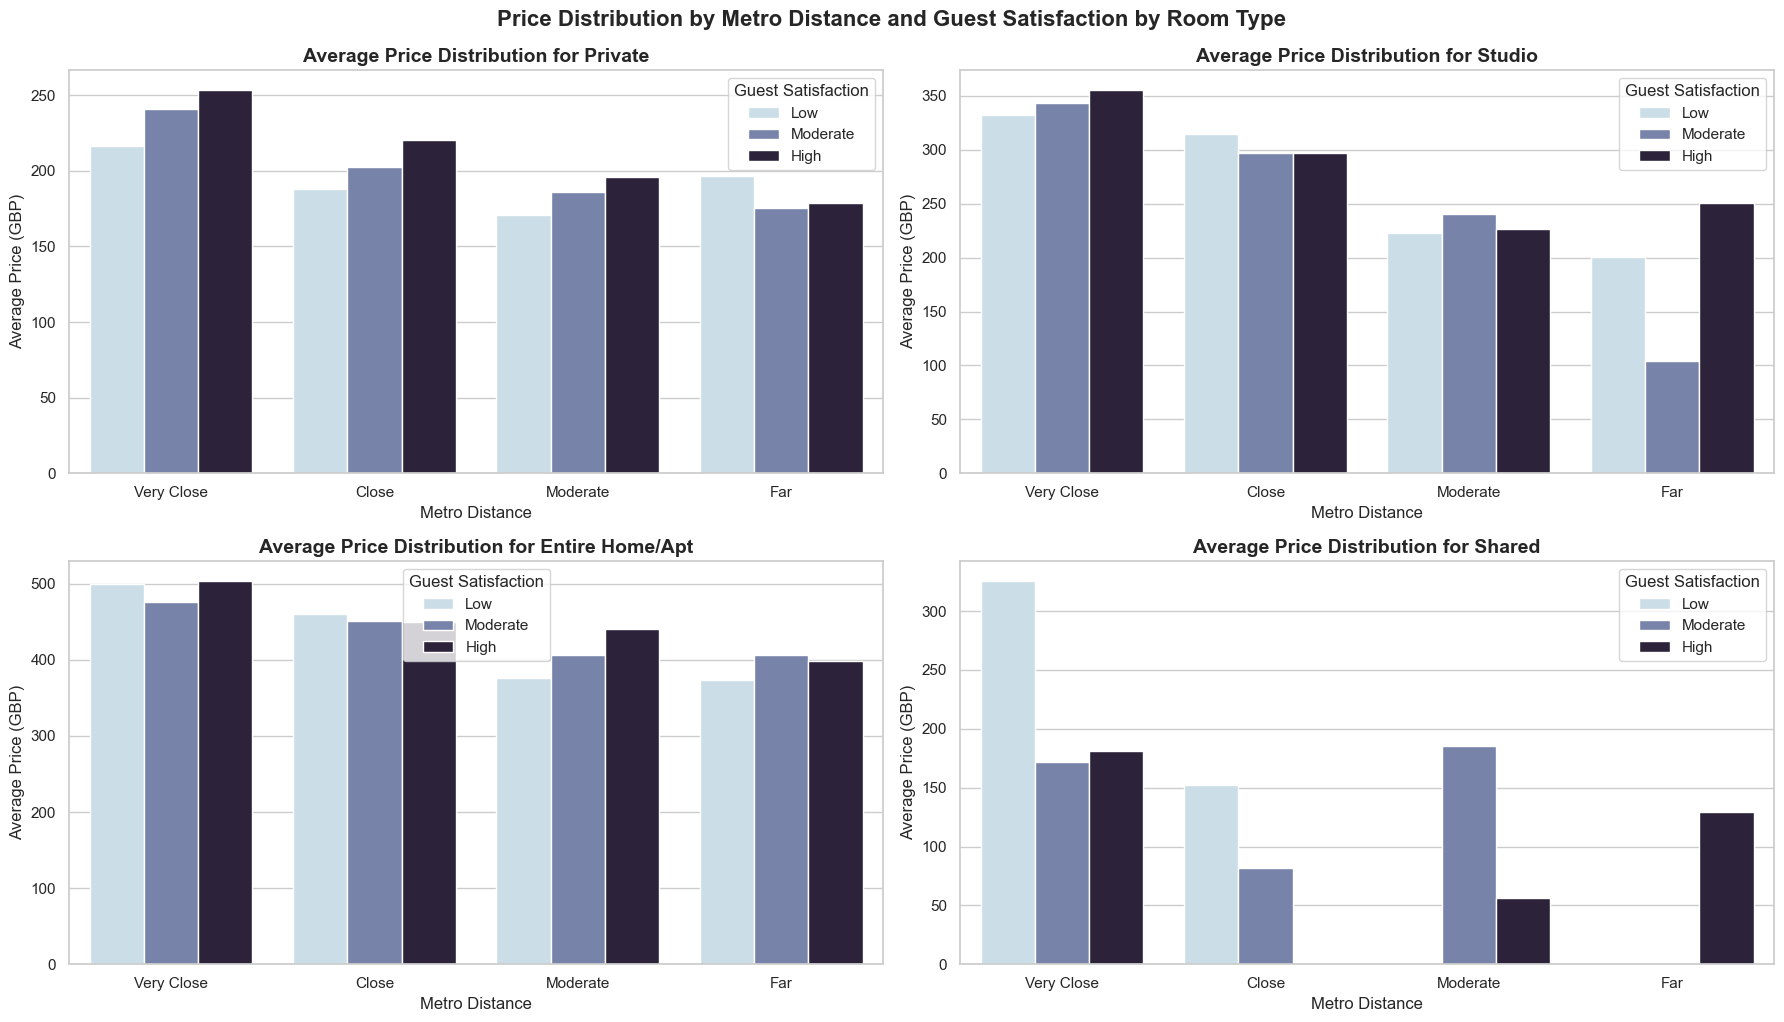

In [22]:
# Copying the dataframe so that the cleaned dataset is untouched
df_plot = df_cleaned.copy()

#Creating bins for metro distance to categorize them
metro_bins = [0.00, 0.50, 1.00, 1.50, 2.19]
metro_labels = ['Very Close', 'Close', 'Moderate', 'Far']
df_plot['Metro_Distance_Bins'] = pd.cut(df_plot['Metro_Distance'], bins=metro_bins, labels=metro_labels, right=False)

#Creating bins for Guest Satisfaction to categorize them
guest_labels = ['Low', 'Moderate', 'High']
df_plot['Guest_Satisfaction_Bins'] = pd.qcut(df_plot['Guest_Satisfaction_Overall'], q=3, labels=guest_labels)

# Set up the figure and axes for a 2x2 grid
room_types = df_plot['Room_Type'].unique()
num_room_types = len(room_types)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

#Creating boxplots for average price distribution by each room type : enumerate is used to keep a count of iteration
for i, room_type in enumerate(room_types):
    avg_price = df_plot[df_plot['Room_Type'] == room_type].groupby(['Metro_Distance_Bins', 'Guest_Satisfaction_Bins'],observed=False)['Price'].mean().reset_index()
    sns.barplot(data=avg_price, x='Metro_Distance_Bins', y='Price', hue='Guest_Satisfaction_Bins', palette='ch:s=.25,rot=-.25', ax=axes[i])
    axes[i].set_title(f'Average Price Distribution for {room_type}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Metro Distance')
    axes[i].set_ylabel('Average Price (GBP)')
    axes[i].legend(title='Guest Satisfaction')


#Adjust layout to beautify the graph
plt.tight_layout()
plt.suptitle('Price Distribution by Metro Distance and Guest Satisfaction by Room Type', fontsize=16, weight='bold', y=1.02)
plt.show()

**Impact of Metro Distance and Guest Satisfaction on Airbnb Pricing**

This analysis evaluates how metro proximity and guest satisfaction influence listing prices across room types. Results show that properties closer to metro stations consistently command higher prices. However, strong guest satisfaction helps sustain pricing even for listings located farther from metro access, particularly for private and shared rooms. Entire Home and Studio listings maintain premium pricing across distances, with satisfaction further strengthening pricing power.
